In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.metrics import precision_score, recall_score, classification_report



# Data extracting and preprocessing 

In [2]:
data = pd.read_csv(r"C:\Users\vital\Desktop\tb_chest_radiogramms\cards.csv")
data['labels'].unique()

array(['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'joker', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',

In [3]:
DATADIR_T = r"C:\Users\vital\Desktop\tb_chest_radiogramms\Cards\train"
DATADIR_Test = r"C:\Users\vital\Desktop\tb_chest_radiogramms\Cards\test"
DATADIR_V = r"C:\Users\vital\Desktop\tb_chest_radiogramms\Cards\valid"
CATEGORIES = ['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'joker', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',
       'two of clubs', 'two of diamonds', 'two of hearts',
       'two of spades']

train_data = []
valid_data = []
test_data = []
IMG_SIZE = 128

def create_data(data,DATADIR):
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification 

        for img in os.listdir(path):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_data(train_data,DATADIR_T)
create_data(valid_data,DATADIR_Test)
create_data(test_data,DATADIR_V)
print(train_data)

[[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 18,  17,  16, ..., 255, 255, 255],
       [225, 224, 220, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255]], dtype=uint8), 0], [array([[249, 249, 249, ..., 247, 247, 246],
       [249, 249, 248, ..., 247, 247, 246],
       [248, 248, 247, ..., 246, 247, 246],
       ...,
       [247, 247, 247, ..., 246, 247, 247],
       [247, 247, 247, ..., 246, 247, 246],
       [248, 247, 246, ..., 247, 247, 247]], dtype=uint8), 0], [array([[  0,   1,  21, ...,   5,   0,   1],
       [  1,  62, 254, ..., 254,  62,   1],
       [ 85, 255, 253, ..., 253, 253,  72],
       ...,
       [ 84, 255, 255, ..., 253, 254,  84],
       [  2,  67, 252, ..., 253,  62,   1],
       [  1,   1,  84, ...,  77,   0,   0]], dtype=uint8), 0], [array([[255, 252, 254, ..., 199, 230, 245],
       [253, 255, 254, ..., 207, 204, 202],
       [255, 252, 209,

In [4]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)

In [5]:
X_train,y_train = [],[]
X_valid,y_valid = [],[]
X_test,y_test = [],[]
def split(X,y,data):
    for features,label in data:
        X.append(features)
        y.append(label)
    return data
split(X_train,y_train,train_data)
split(X_valid,y_valid,valid_data)
split(X_test,y_test,test_data)

def scale(image):
    # we make sure the value is a float
    image = tf.cast(image, tf.float32)
    # since the possible values for the inputs are 0 to 255 (256 different shades of grey)
    # if we divide each element by 255, we would get the desired result -> all elements will be between 0 and 1
    image /= 255.

    return image
X_train = [scale(x) for x in X_train]
X_test = [scale(x) for x in X_test]
X_valid = [scale(x) for x in X_valid]

In [6]:
def into_vectros(y):
    vecs = []

    # Loop through all numeric values
    for x in y:
        # Create a vector of zeros for each number
        vec = [0] * len(CATEGORIES)

        # Setting the unit to the position corresponding to the number (category)
        vec[x] = 1

        # Adding a vector to an array
        vecs.append(vec)
    return vecs

y_train = into_vectros(y_train)
y_valid = into_vectros(y_valid)
y_test = into_vectros(y_test)




In [7]:
X_train,X_valid,X_test= np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1),np.array(X_valid).reshape(-1, IMG_SIZE, IMG_SIZE, 1),np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train,y_valid,y_test= np.array(y_train),np.array(y_valid),np.array(y_test)

# Model compiling, fitting and evaluation

In [8]:
# model = tf.keras.models.Sequential([
#                               tf.keras.layers.Conv2D(64, (4, 4), activation='relu', input_shape=X_train.shape[1:]),
#                               tf.keras.layers.MaxPooling2D((2, 2)),
#                               tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#                               tf.keras.layers.MaxPooling2D((3, 3)),
#                               tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
#                               tf.keras.layers.Flatten(),
#                               tf.keras.layers.Dense(50, activation='relu'),
#                               tf.keras.layers.Dense(53,activation = 'Softmax')
# ])

# model.summary()
# model.compile(optimizer=tf.keras.optimizers.experimental.Adagrad(learning_rate = 0.1),
#               loss='categorical_crossentropy',
#               metrics = ['accuracy']
# )


In [9]:
# history = model.fit(X_train,y_train,
#                     epochs=15,batch_size = 50, 
#                     callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
#                     ,validation_data=[X_valid,y_valid])

In [10]:
# model.save('my_model_cards.h5py')
model = tf.keras.models.load_model('my_model_cards.h5py')

In [11]:
y_test_copy = np.argmax(y_test, axis=1)
y_test_copy.shape

(265,)

In [12]:
loss, accuracy = model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 88ms/step - loss: 1.8788 - accuracy: 0.7811


In [13]:
print(loss,accuracy)

1.878774881362915 0.7811321020126343


In [14]:
y_pred = model.predict(X_test)
y_test_copy = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
print(y_test_copy.shape,y_pred.shape)

9/9 [==============================] - 1s 92ms/step
(265,) (265,)


In [15]:
# Calculate precision and recall for each class
precision = precision_score(y_test_copy, y_pred, average=None)
recall = recall_score(y_test_copy, y_pred, average=None)

# Print precision and recall for each class
for i in range(len(precision)):
    print(f"Class {i} - Precision: {precision[i]}, Recall: {recall[i]}")

# You can also use classification_report to get a more comprehensive report
print("Classification Report:")
print(classification_report(y_test_copy, y_pred))


Class 0 - Precision: 0.6, Recall: 0.6
Class 1 - Precision: 0.75, Recall: 0.6
Class 2 - Precision: 0.75, Recall: 0.6
Class 3 - Precision: 1.0, Recall: 1.0
Class 4 - Precision: 0.7142857142857143, Recall: 1.0
Class 5 - Precision: 0.625, Recall: 1.0
Class 6 - Precision: 1.0, Recall: 0.8
Class 7 - Precision: 0.625, Recall: 1.0
Class 8 - Precision: 0.7142857142857143, Recall: 1.0
Class 9 - Precision: 0.8, Recall: 0.8
Class 10 - Precision: 1.0, Recall: 0.8
Class 11 - Precision: 0.7142857142857143, Recall: 1.0
Class 12 - Precision: 1.0, Recall: 0.6
Class 13 - Precision: 1.0, Recall: 0.8
Class 14 - Precision: 0.7142857142857143, Recall: 1.0
Class 15 - Precision: 0.8333333333333334, Recall: 1.0
Class 16 - Precision: 0.8, Recall: 0.8
Class 17 - Precision: 0.8, Recall: 0.8
Class 18 - Precision: 0.5, Recall: 0.4
Class 19 - Precision: 0.6, Recall: 0.6
Class 20 - Precision: 1.0, Recall: 0.2
Class 21 - Precision: 1.0, Recall: 1.0
Class 22 - Precision: 0.6, Recall: 0.6
Class 23 - Precision: 0.66666666

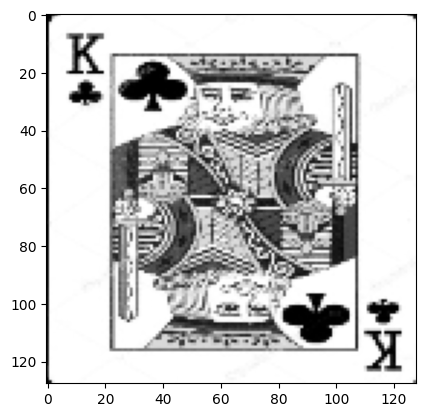

Real result:king of clubs
ace of clubs


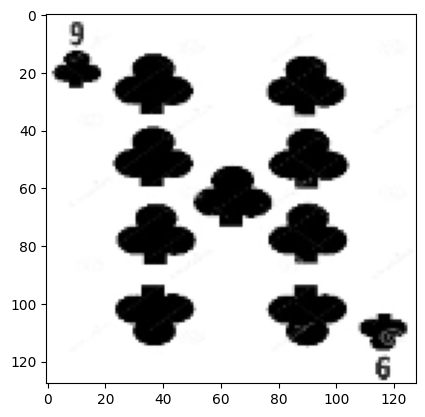

Real result:nine of clubs
ace of clubs


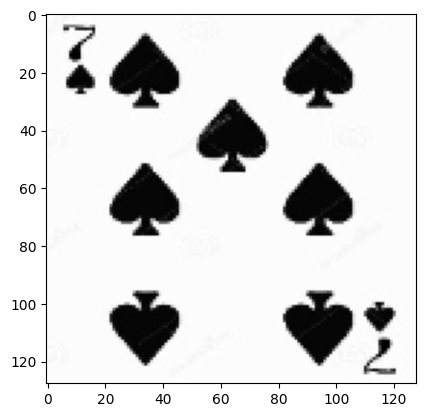

Real result:seven of spades
ace of clubs


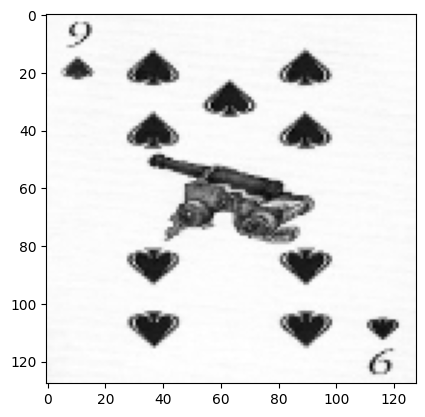

Real result:nine of spades
ace of clubs


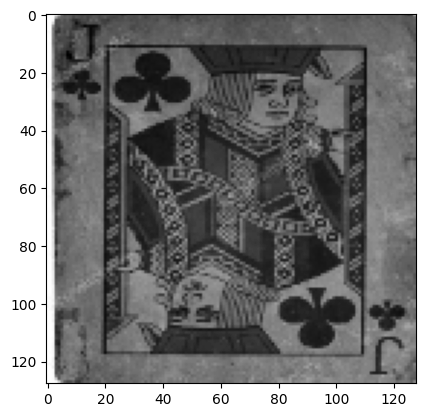

Real result:jack of clubs
ace of clubs


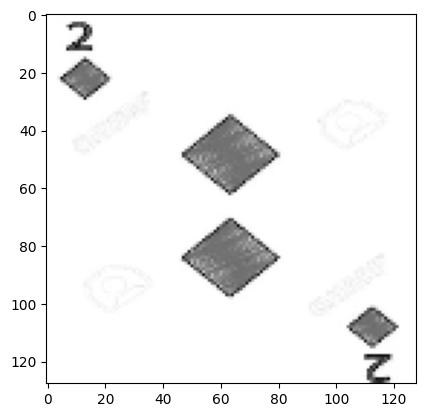

Real result:two of diamonds
ace of clubs


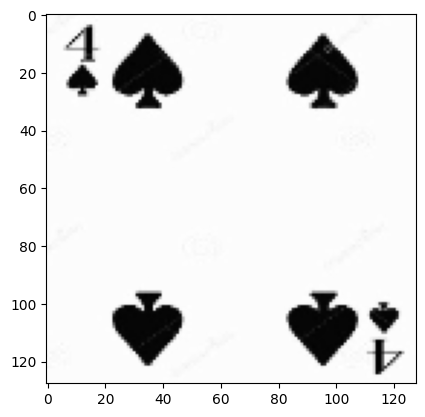

Real result:four of spades
ace of clubs


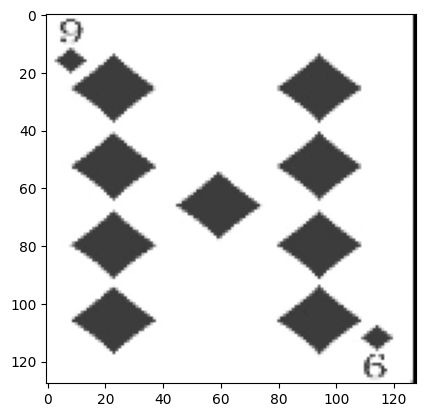

Real result:nine of diamonds
ace of clubs


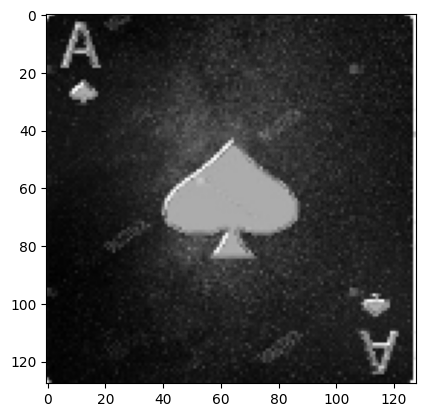

Real result:ace of spades
ace of clubs


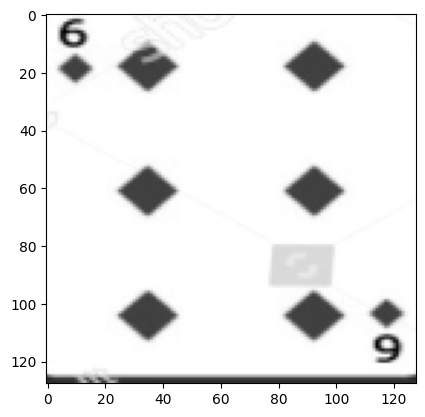

Real result:six of diamonds
ace of clubs


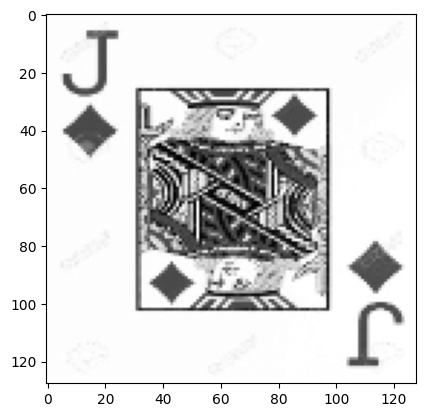

Real result:jack of diamonds
ace of clubs


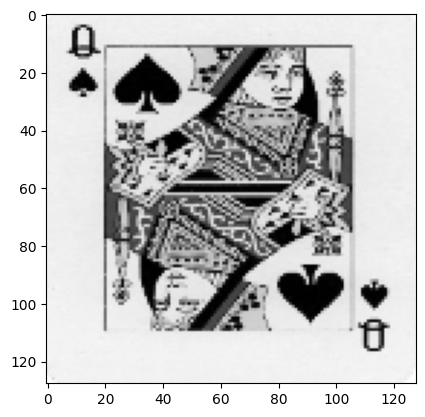

Real result:queen of spades
ace of clubs


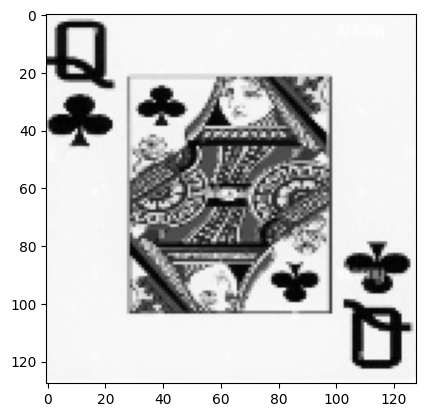

Real result:queen of clubs
ace of clubs


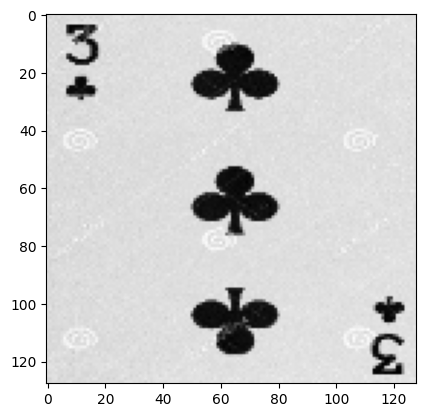

Real result:three of clubs
ace of clubs


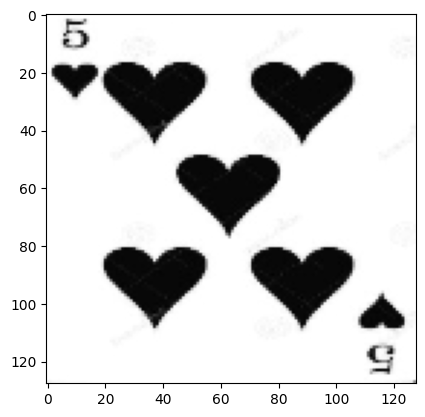

Real result:five of hearts
ace of clubs


In [25]:
for i in range(15):
    plt.imshow(X_test[i], cmap='gray')
    plt.show()
    print(f"Real result:{CATEGORIES[y_test_copy[i]]}")
    print(CATEGORIES[np.argmax(y_pred[i])])